In [95]:
## 데이터 불러오기
import pandas as pd

filename = 'test.csv'
test_df = pd.read_csv('../assignment_0305/test.csv')
train_df = pd.read_csv('../assignment_0305/train.csv')



In [96]:
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import seaborn as sns

In [97]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [98]:
train_df[train_df['road_name']=='시청로']

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
231,TRAIN_0000231,20220317,목,9,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,부동산,33.254531,126.511810,없음,한국통신,33.254896,126.510361,있음,34.0
235,TRAIN_0000235,20211218,토,20,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,한국통신,33.255094,126.509577,없음,우체국,33.255286,126.508813,없음,13.0
525,TRAIN_0000525,20220530,월,14,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,우체국,33.255286,126.508813,없음,한국통신,33.255094,126.509577,없음,27.0
569,TRAIN_0000569,20211204,토,6,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,우체국,33.255286,126.508813,없음,의료보험조합,33.255659,126.507333,없음,16.0
750,TRAIN_0000750,20210922,수,4,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,한국통신,33.254896,126.510361,있음,부동산,33.254531,126.511810,없음,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700768,TRAIN_4700768,20220713,수,10,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,부동산,33.254531,126.511810,없음,한국통신,33.254896,126.510361,있음,23.0
4700885,TRAIN_4700885,20220530,월,21,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,의료보험조합,33.255659,126.507333,없음,우체국,33.255286,126.508813,없음,37.0
4700953,TRAIN_4700953,20220107,금,14,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,한국통신,33.254896,126.510361,있음,한국통신,33.255094,126.509577,없음,36.0
4700961,TRAIN_4700961,20220215,화,11,3,107,시청로,0,0,60.0,0.0,0.0,0.0,0,한국통신,33.255094,126.509577,없음,한국통신,33.254896,126.510361,있음,22.0


In [99]:

# for snn in train_df['start_node_name'].unique():
#     print("======================================================")
#     print(snn)
#     check_df = train_df[train_df['start_node_name']==snn]
#     for col in check_df.columns:
#         unique = len(check_df[col].unique())
#         print((col, ':', unique) if col =='start_turn_restricted' else '')

In [146]:
print(train_df['base_date'].min(),train_df['base_date'].max())

20210901 20220731


## 데이터 확인

In [100]:
test_df.isnull().sum() ## 결측치 확인

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [101]:
train_df.isnull().sum() ## 결측치 확인

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [102]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
base_date,291241.0,2.022082e+07,8.886111,2.022080e+07,2.022081e+07,2.022082e+07,2.022082e+07,2.022083e+07
base_hour,291241.0,1.185685e+01,6.803378,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
lane_count,291241.0,2.021371e+00,0.750898,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
road_rating,291241.0,1.052459e+02,1.862653,1.030000e+02,1.030000e+02,1.060000e+02,1.070000e+02,1.070000e+02
multi_linked,291241.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
connect_code,291241.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
maximum_speed_limit,291241.0,5.877143e+01,11.390743,3.000000e+01,5.000000e+01,6.000000e+01,7.000000e+01,8.000000e+01
vehicle_restricted,291241.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
weight_restricted,291241.0,3.651902e+03,11327.618389,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+04
height_restricted,291241.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [103]:
# ## 데이터 확인
# for col in test_df.columns:
#     unique = len(test_df[col].unique())
#     print(col, ':', unique if unique>32 else test_df[col].unique())
    
for col in train_df.columns:
    unique = len(train_df[col].unique())
    print(col, ':', unique if unique>32 else train_df[col].unique())
    
    
# 연결로코드 103: 속성 변화점
# 중용구간: 2개 이상의 노선이 도로의 일정 구 간을 공동으로 사용하는 구간

id : 4701217
base_date : 281
day_of_week : ['목' '일' '금' '화' '월' '수' '토']
base_hour : [17 21  7 13  8  0 16 15  2 11 10 22 12 23 14  6  9 19  1  4 20 18  3  5]
lane_count : [1 2 3]
road_rating : [106 103 107]
road_name : 61
multi_linked : [0 1]
connect_code : [  0 103]
maximum_speed_limit : [60. 80. 50. 70. 30. 40.]
vehicle_restricted : [0.]
weight_restricted : [32400.     0. 43200. 50000.]
height_restricted : [0.]
road_type : [3 0]
start_node_name : 487
start_latitude : 586
start_longitude : 586
start_turn_restricted : ['없음' '있음']
end_node_name : 487
end_latitude : 586
end_longitude : 586
end_turn_restricted : ['없음' '있음']
target : 102


In [162]:
# 국가별 판매량
day_avg = train_df.groupby(['day_of_week'])['target'].mean().sort_values(ascending=False).reset_index()
max_avg = train_df.groupby(['maximum_speed_limit'])['target'].mean().sort_values(ascending=False).reset_index()
hour_avg = train_df.groupby(['base_hour'])['target'].mean().sort_values(ascending=False).reset_index()
lane_avg = train_df.groupby(['lane_count'])['target'].mean().sort_values(ascending=False).reset_index()
month = train_df['base_date']//100
temp_train_df = train_df
temp_train_df['month']= month
month_avg = temp_train_df.groupby(['month'])['target'].mean().sort_values(ascending=False).reset_index()
temp_train_df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,202206
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,202207
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,202110
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,202203
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,202110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,202111
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,202203
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,202206
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,202110


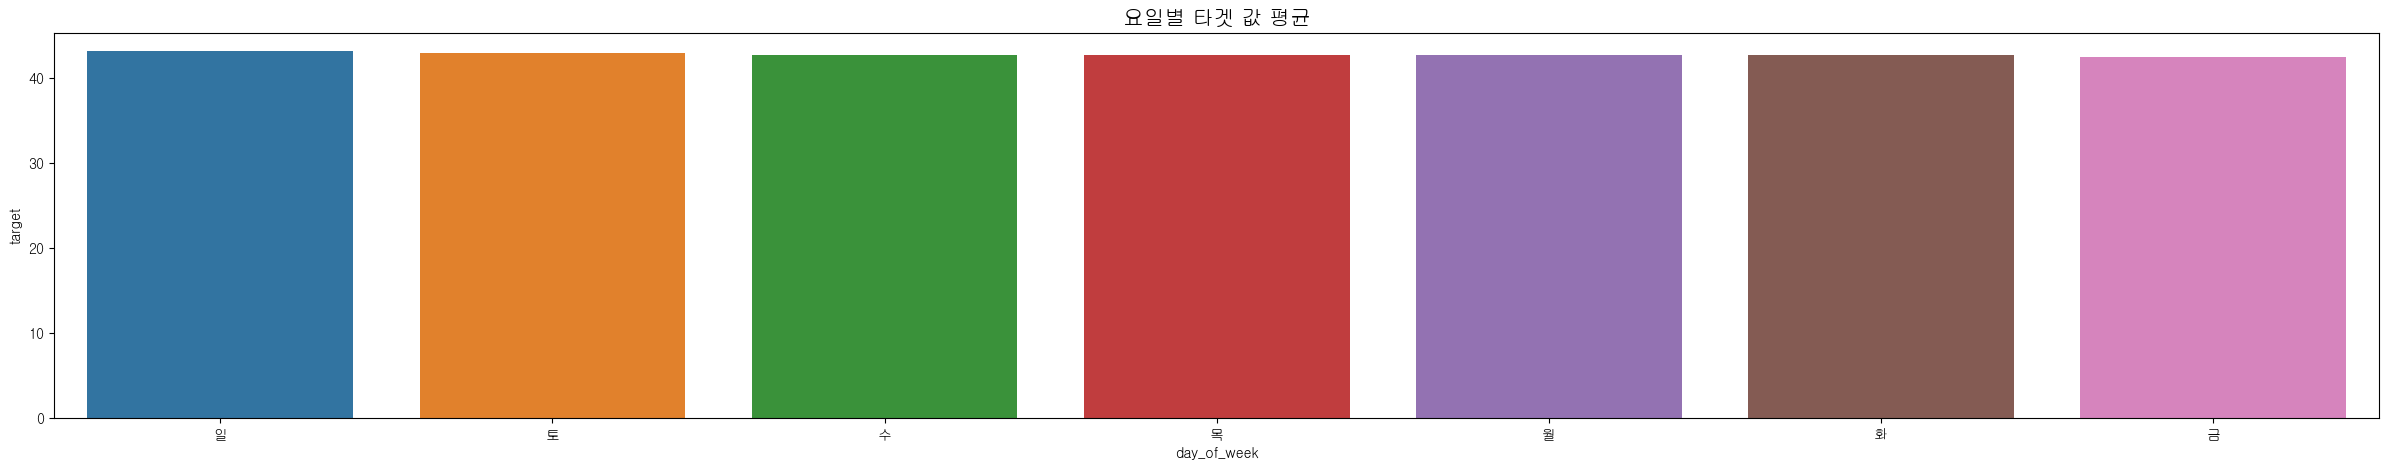

In [141]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'day_of_week', y = 'target', data = day_avg)
plt.title('요일별 타겟 값 평균', fontsize = 15)
plt.show()

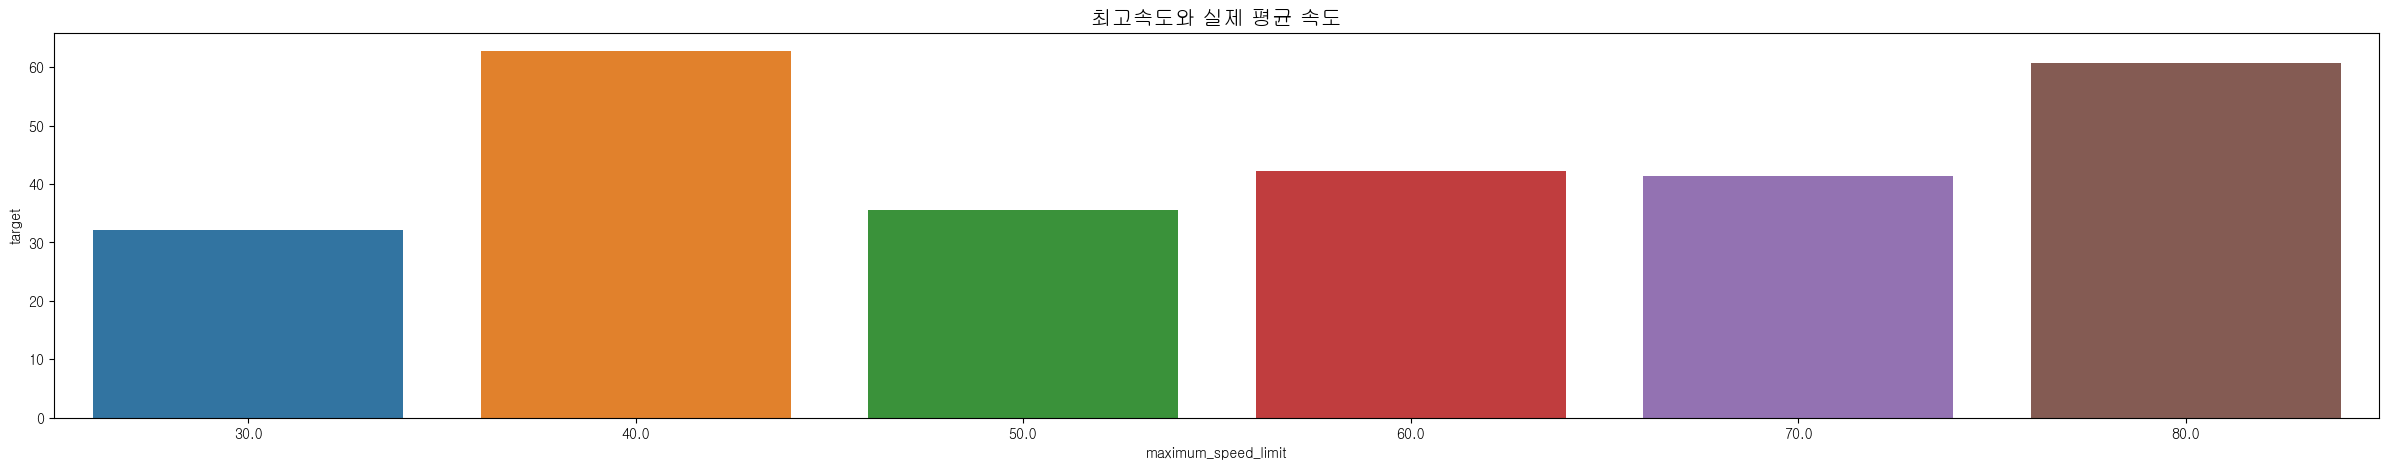

In [142]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'maximum_speed_limit', y = 'target', data = max_avg)
plt.title('최고속도와 실제 평균 속도', fontsize = 15)
plt.show()

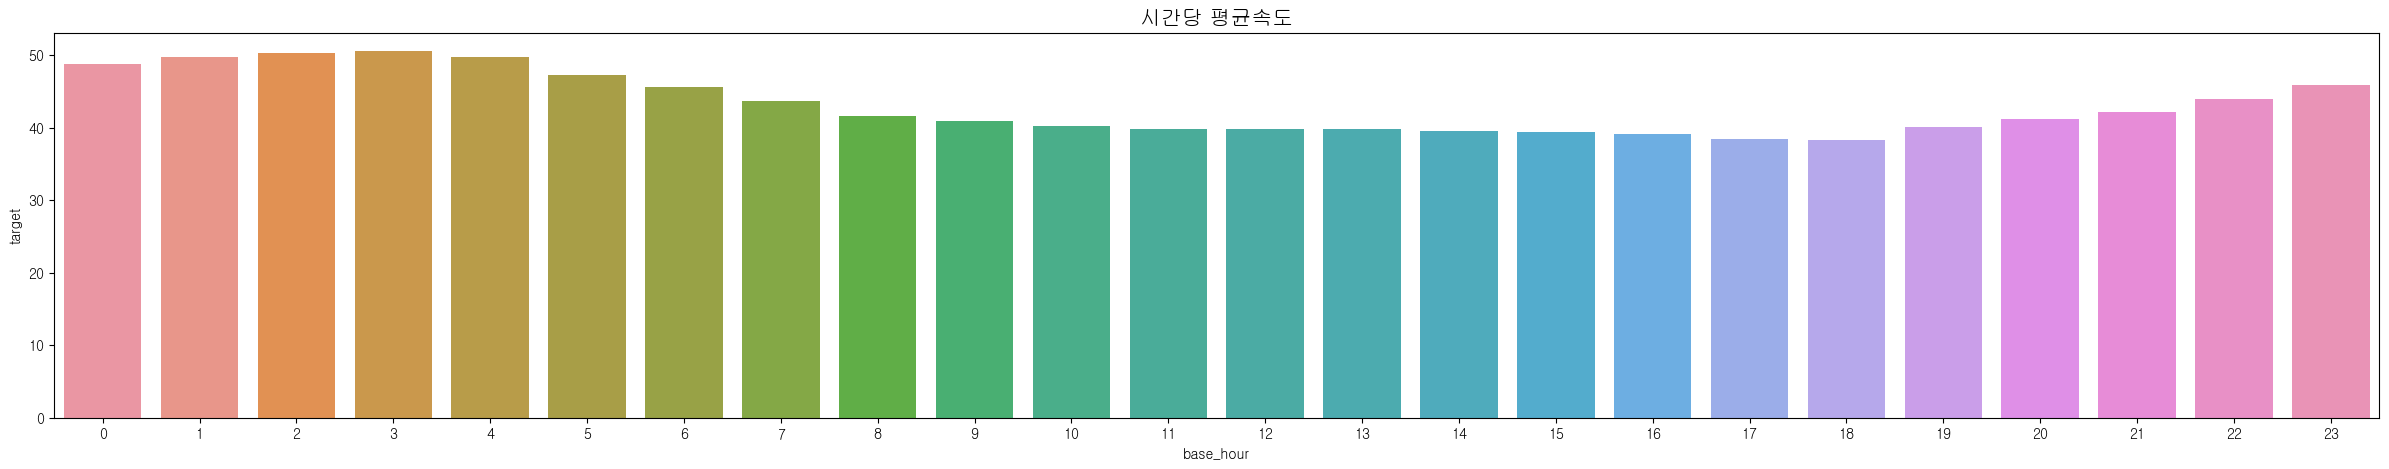

In [137]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'base_hour', y = 'target', data = hour_avg)
plt.title('시간당 평균속도', fontsize = 15)
plt.show()

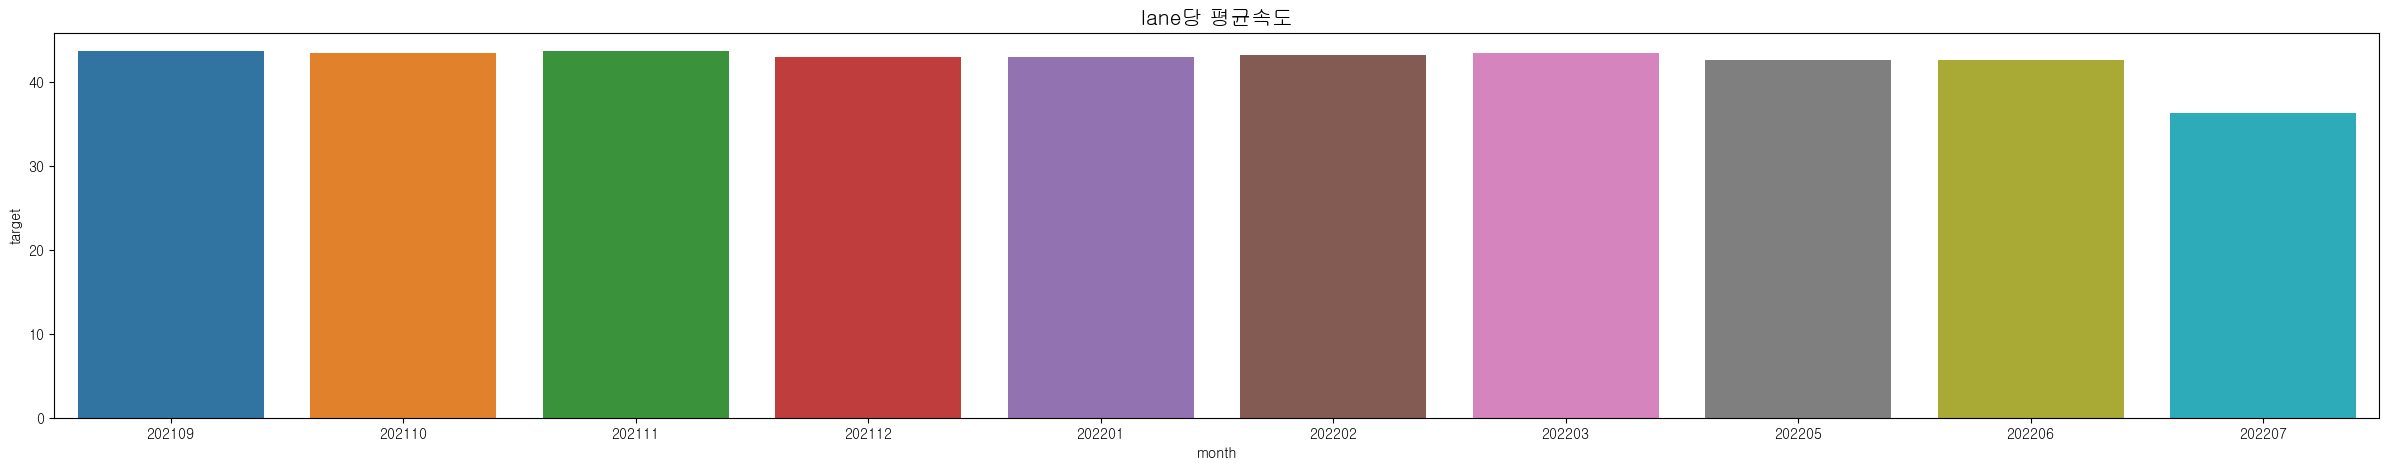

In [163]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'month', y = 'target', data = month_avg)
plt.title('lane당 평균속도', fontsize = 15)
plt.show()

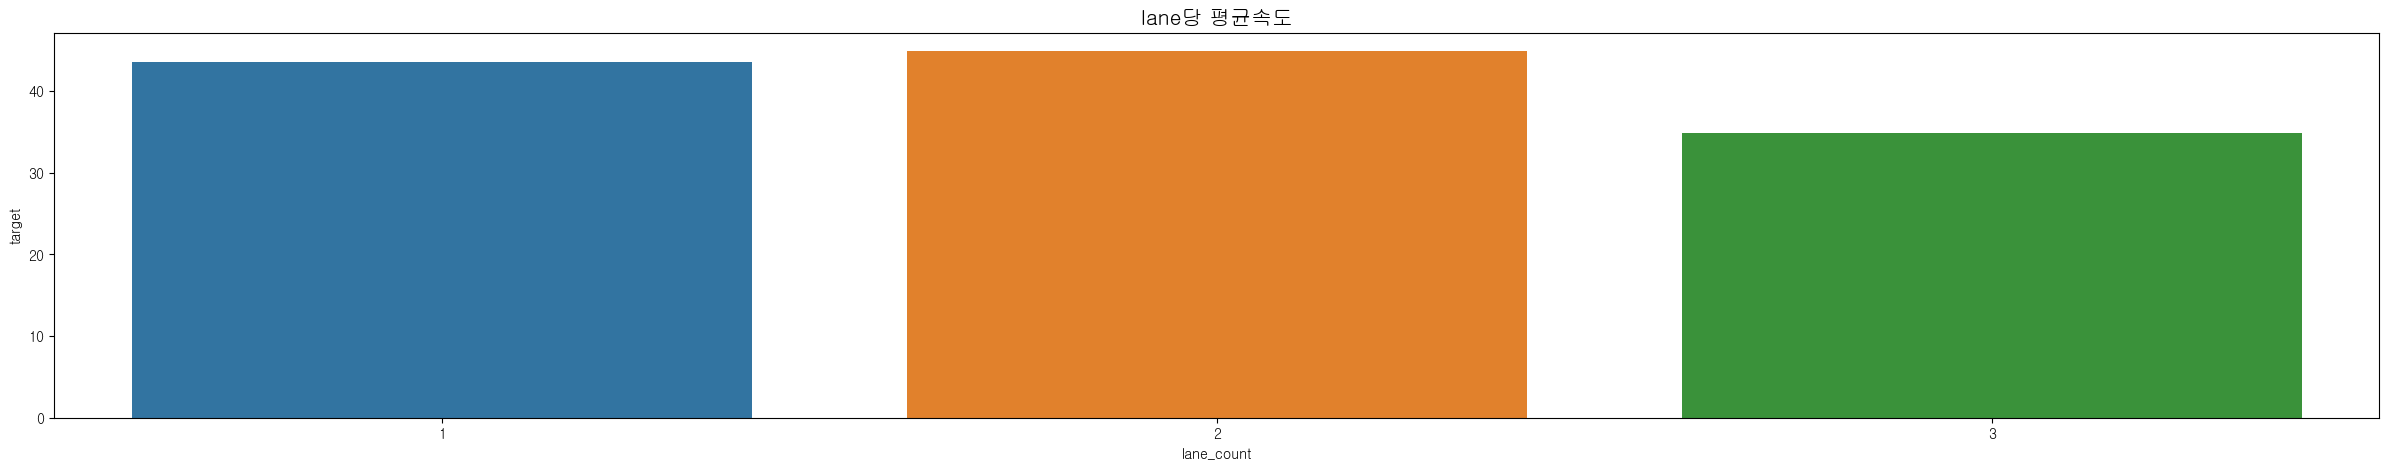

In [143]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'lane_count', y = 'target', data = lane_avg)
plt.title('lane당 평균속도', fontsize = 15)
plt.show()

C:\Users\donghwan\AppData\Local\Temp\ipykernel_6568\3138733437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['end_latitude'])


<Axes: xlabel='end_latitude', ylabel='Density'>

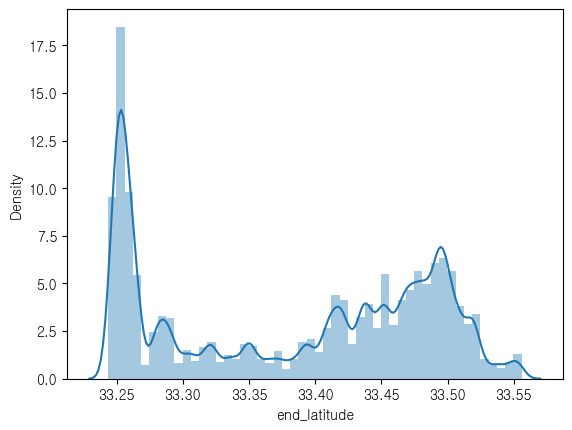

In [144]:
sns.distplot(train_df['end_latitude'])

In [110]:
# sns.distplot(train_df['start_longitude'])

In [111]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

id : 4701217
base_date : 281
day_of_week : ['목' '일' '금' '화' '월' '수' '토']
base_hour : [17 21  7 13  8  0 16 15  2 11 10 22 12 23 14  6  9 19  1  4 20 18  3  5]
lane_count : [1 2 3]
road_rating : [106 103 107]
road_name : 61
multi_linked : [0 1]
connect_code : [  0 103]
maximum_speed_limit : [60. 80. 50. 70. 30. 40.]
vehicle_restricted : [0.]
weight_restricted : [32400.     0. 43200. 50000.]
height_restricted : [0.]
road_type : [3 0]
start_node_name : 487
start_latitude : 586
start_longitude : 586
start_turn_restricted : ['없음' '있음']
end_node_name : 487
end_latitude : 586
end_longitude : 586
end_turn_restricted : ['없음' '있음']
target : 102

In [140]:
# multi_linked: 전처리 불필요

# base_date 어케할지모르겠음 일단 drop함

# id, vehicle_restricted, height_restricted: 무의미한 데이터, 제거
train_processed = train_df.drop(['id', 'vehicle_restricted', 'height_restricted'], axis = 1)
# start_node_name, end_node_name, road_name: latitude, longitude와 매칭되므로 무의미한 데이터, 제거
train_processed = train_processed.drop(['start_node_name', 'end_node_name', 'road_name'], axis = 1)
# lane_count, maximum_speed_limit  : 얘도 정규화해야하나? 3개 다음에 4개 되는게 의미 있는데...
# 일단 안건드림
# rode_type, day_of_week, weight_restricted, connect_code, base_hour, road_rating: one-hot encoding
train_processed = pd.get_dummies(train_processed, columns=['road_type', 'day_of_week', 'weight_restricted', 'connect_code', 'base_hour', 'maximum_speed_limit', 'road_rating', 'road_type'])
# start_turn_restricted, end_turn_restricted: 있음은 1, 없음은 0
train_processed = train_processed.replace({'있음':1, '없음':0})

# start_latitude, start_longitude, end_latitude, end_longitude: 정규화? 필요..? 정규화는 좋은데 max랑 min을 정하는게 좋을지도?
train_processed[['norm_start_latitude', 'norm_start_longitude', 'norm_end_latitude', 'norm_end_longitude']] = (train_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']]-train_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].min())/(train_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].max()-train_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].min())
train_processed = train_processed.drop(['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], axis = 1)

KeyboardInterrupt: 

In [139]:
test_processed = test_df.drop(['id', 'vehicle_restricted', 'height_restricted'], axis = 1)
# start_node_name, end_node_name, road_name: latitude, longitude와 매칭되므로 무의미한 데이터, 제거
# test_processed = test_processed.drop(['start_node_name', 'end_node_name', 'road_name'], axis = 1)
# lane_count, maximum_speed_limit  : 얘도 정규화해야하나? 3개 다음에 4개 되는게 의미 있는데...
# 일단 안건드림
# rode_type, day_of_week, weight_restricted, connect_code, base_hour, road_rating: one-hot encoding
test_processed = pd.get_dummies(test_processed, columns=['start_node_name', 'end_node_name', 'road_name','road_type', 'day_of_week', 'weight_restricted', 'connect_code', 'base_hour', 'maximum_speed_limit', 'road_rating', 'road_type'])
# start_turn_restricted, end_turn_restricted: 있음은 1, 없음은 0
test_processed = test_processed.replace({'있음':1, '없음':0})

# start_latitude, start_longitude, end_latitude, end_longitude: 정규화? 필요..? 정규화는 좋은데 max랑 min을 정하는게 좋을지도?
# test_processed[['norm_start_latitude', 'norm_start_longitude', 'norm_end_latitude', 'norm_end_longitude']] = (test_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']]-test_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].min())/(test_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].max()-test_processed[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].min())
test_processed = test_processed.drop(['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], axis = 1)

In [115]:
train_processed.head(5)

,lane_count,multi_linked,start_turn_restricted,end_turn_restricted,target,road_type_0,road_type_3,day_of_week_금,day_of_week_목,day_of_week_수,day_of_week_월,day_of_week_일,day_of_week_토,day_of_week_화,weight_restricted_0.0,weight_restricted_32400.0,weight_restricted_43200.0,weight_restricted_50000.0,connect_code_0,connect_code_103,base_hour_0,base_hour_1,base_hour_2,base_hour_3,base_hour_4,base_hour_5,base_hour_6,base_hour_7,base_hour_8,base_hour_9,base_hour_10,base_hour_11,base_hour_12,base_hour_13,base_hour_14,base_hour_15,base_hour_16,base_hour_17,base_hour_18,base_hour_19,base_hour_20,base_hour_21,base_hour_22,base_hour_23,maximum_speed_limit_30.0,maximum_speed_limit_40.0,maximum_speed_limit_50.0,maximum_speed_limit_60.0,maximum_speed_limit_70.0,maximum_speed_limit_80.0,road_rating_103,road_rating_106,road_rating_107,road_type_0,road_type_3,norm_start_latitude,norm_start_longitude,norm_end_latitude,norm_end_longitude
0,1,0,0,0,52.0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.589530,0.641427,0.589534,0.641057
1,2,0,1,0,30.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0.822965,0.463021,0.836017,0.459191
2,2,0,0,0,61.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.114228,0.248530,0.117193,0.239911
3,2,0,0,0,20.0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0.008473,0.513932,0.006824,0.512628
4,2,0,0,0,38.0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.699772,0.192342,0.701251,0.197154


In [120]:
result_skfold = StratifiedKFold(n_splits=3)
result_clf_macro = DecisionTreeClassifier(random_state=100)

n_iter = 0 # 5번 진행 예정이니 0 먼저 지정

cv_accuracy_macro=[]
cv_precision_macro=[]
cv_recall_macro=[]


label= train_processed['target'].values

features = train_processed.drop(['target'], axis = 1).values

for train_idx, test_idx in result_skfold.split(features, label):
    X_train, X_test = features[train_idx], features[test_idx]
    
    y_train, y_test = label[train_idx], label[test_idx]
    
    #학습을 진행
    result_clf_macro.fit(X_train, y_train)
    #예측
    pred_macro = result_clf_macro.predict(X_test)

    #정확도 관련해서 측정
    n_iter +=1 
    ### macro
    accuracy_macro = np.round(accuracy_score(y_test, pred_macro),3)
    precision_macro = np.round(precision_score(y_test,pred_macro, average='macro'),3)
    recall_macro = np.round(recall_score(y_test, pred_macro, average='macro'),3)
    
    print('\n Macro일때의 \n{} 교차검증 정확도 : {}, 교차검증 precision :{}, 교차검증 recall :{}'.format(n_iter, accuracy_macro, precision_macro, recall_macro))
    cv_accuracy_macro.append(accuracy_macro)
    cv_precision_macro.append(precision_macro)
    cv_recall_macro.append(recall_macro)
    
    
print('\n')
#print('\n 평균 정확도 ', np.mean(accuracy))
print('\n Macro의 평균 검증 정확도', np.mean(cv_accuracy_macro), np.mean(cv_precision_macro), np.mean(cv_recall_macro))

C:\Users\donghwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\donghwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Macro일때의 
1 교차검증 정확도 : 0.12, 교차검증 precision :0.104, 교차검증 recall :0.102


C:\Users\donghwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Macro일때의 
2 교차검증 정확도 : 0.12, 교차검증 precision :0.106, 교차검증 recall :0.104


C:\Users\donghwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Macro일때의 
3 교차검증 정확도 : 0.12, 교차검증 precision :0.106, 교차검증 recall :0.103



 Macro의 평균 검증 정확도 0.12 0.10533333333333333 0.103


In [135]:
# train_df_simple = train_df[['day_of_week', 'base_hour', 'maximum_speed_limit','target']]
train_df_simple = train_df[['base_hour', 'target']]
train_df_simple = pd.get_dummies(train_df_simple, columns=['base_hour'])
train_df_simple

,target,base_hour_0,base_hour_1,base_hour_2,base_hour_3,base_hour_4,base_hour_5,base_hour_6,base_hour_7,base_hour_8,base_hour_9,base_hour_10,base_hour_11,base_hour_12,base_hour_13,base_hour_14,base_hour_15,base_hour_16,base_hour_17,base_hour_18,base_hour_19,base_hour_20,base_hour_21,base_hour_22,base_hour_23
0,52.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,61.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,38.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4701213,65.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4701214,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4701215,73.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
result_skfold = StratifiedKFold(n_splits=30)
result_clf_macro = DecisionTreeClassifier(max_depth = 11,random_state=100)

n_iter = 0 # 5번 진행 예정이니 0 먼저 지정

cv_accuracy_macro=[]
cv_precision_macro=[]
cv_recall_macro=[]


label= train_df_simple['target'].values

features = train_df_simple.drop(columns=['target']).values

for train_idx, test_idx in result_skfold.split(features, label):
    X_train, X_test = features[train_idx], features[test_idx]
    
    y_train, y_test = label[train_idx], label[test_idx]
    
    #학습을 진행
    result_clf_macro.fit(X_train, y_train)
    #예측
    pred_macro = result_clf_macro.predict(X_test)

    #정확도 관련해서 측정
    n_iter +=1 
    ### macro
    accuracy_macro = np.round(accuracy_score(y_test, pred_macro),3)
    precision_macro = np.round(precision_score(y_test,pred_macro, average='macro'),3)
    recall_macro = np.round(recall_score(y_test, pred_macro, average='macro'),3)
    
    print('\n Macro일때의 \n{} 교차검증 정확도 : {}, 교차검증 precision :{}, 교차검증 recall :{}'.format(n_iter, accuracy_macro, precision_macro, recall_macro))
    cv_accuracy_macro.append(accuracy_macro)
    cv_precision_macro.append(precision_macro)
    cv_recall_macro.append(recall_macro)
    
    
print('\n')
#print('\n 평균 정확도 ', np.mean(accuracy))
print('\n Macro의 평균 검증 정확도', np.mean(cv_accuracy_macro), np.mean(cv_precision_macro), np.mean(cv_recall_macro))

C:\Users\donghwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=30.
  warnings.warn(
C:\Users\donghwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Macro일때의 
1 교차검증 정확도 : 0.025, 교차검증 precision :0.002, 교차검증 recall :0.013


C:\Users\donghwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Macro일때의 
2 교차검증 정확도 : 0.025, 교차검증 precision :0.002, 교차검증 recall :0.013


KeyboardInterrupt: 